In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

#Kaggle Dataset

##Walk through file path

In [ ]:
directory = '/content/drive/MyDrive/DATASET/lung_colon_image_set/'

In [ ]:
Path = glob(directory + '*/*/*.jpeg')

In [ ]:
len(Path)

25000

##Create DataFrame

In [ ]:
df = pd.DataFrame({'path': Path})

In [ ]:
df

,path
0,/content/drive/MyDrive/DATASET/lung_colon_imag...
1,/content/drive/MyDrive/DATASET/lung_colon_imag...
2,/content/drive/MyDrive/DATASET/lung_colon_imag...
3,/content/drive/MyDrive/DATASET/lung_colon_imag...
4,/content/drive/MyDrive/DATASET/lung_colon_imag...
...,...
24995,/content/drive/MyDrive/DATASET/lung_colon_imag...
24996,/content/drive/MyDrive/DATASET/lung_colon_imag...
24997,/content/drive/MyDrive/DATASET/lung_colon_imag...
24998,/content/drive/MyDrive/DATASET/lung_colon_imag...


In [ ]:
df['classes'] = df['path'].apply(lambda x : x.split('/')[7])

In [ ]:
df['classes'].value_counts()

lung_n       5000
lung_scc     5000
lung_aca     5000
colon_aca    5000
colon_n      5000
Name: classes, dtype: int64

In [ ]:
df.to_csv('/content/drive/MyDrive/DATASET/lung_colon_image_set/lung_colon_path.csv', index=False)

#Overview Dataset

In [12]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/lung_colon_image_set/lung_colon_path.csv')
df

,path,classes
0,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
1,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
2,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
3,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
4,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
...,...,...
24995,/content/drive/MyDrive/DATASET/lung_colon_imag...,colon_n
24996,/content/drive/MyDrive/DATASET/lung_colon_imag...,colon_n
24997,/content/drive/MyDrive/DATASET/lung_colon_imag...,colon_n
24998,/content/drive/MyDrive/DATASET/lung_colon_imag...,colon_n


In [ ]:
df.classes.value_counts()

lung_n       5000
lung_scc     5000
lung_aca     5000
colon_aca    5000
colon_n      5000
Name: classes, dtype: int64

(768, 768, 3)


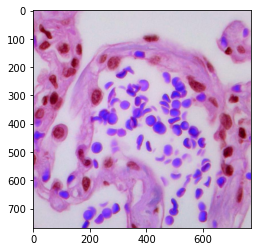

In [14]:
path = df.loc[0, 'path']
image = cv2.imread(path)
print(image.shape)
plt.imshow(image)
plt.show()

**Lung_n**

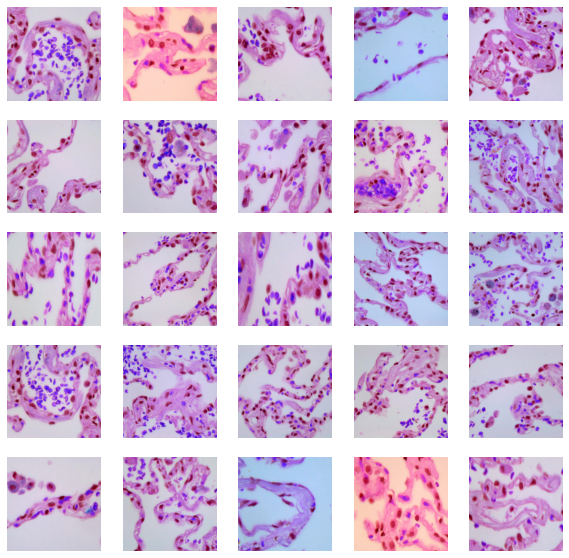

In [ ]:
n = 5
paths = df.path[df.classes == 'lung_n'].values
fig, axs = plt.subplots(nrows = n , ncols = n, figsize=(10, 10))
for i in range(n*n):
  image = cv2.imread(paths[i])
  axs[i//n, i%n].imshow(image)
  axs[i//n, i%n].axis('off')

plt.show()

**Lung_scc**

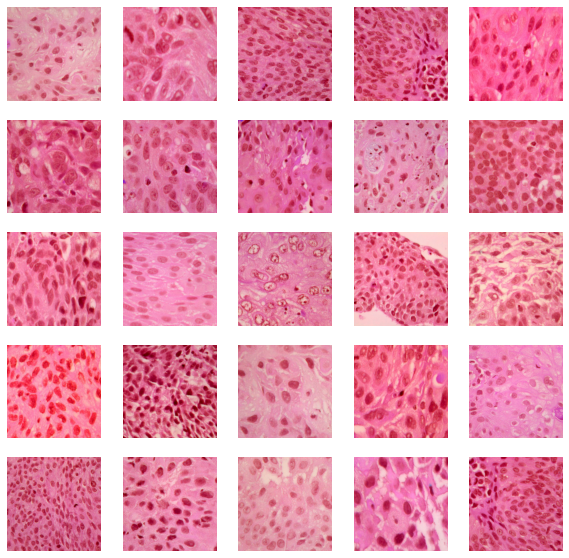

In [ ]:
n = 5
paths = df.path[df.classes == 'lung_scc'].values
fig, axs = plt.subplots(nrows = n , ncols = n, figsize=(10, 10))
for i in range(n*n):
  image = cv2.imread(paths[i])
  axs[i//n, i%n].imshow(image)
  axs[i//n, i%n].axis('off')

plt.show()

**Lung_acc**

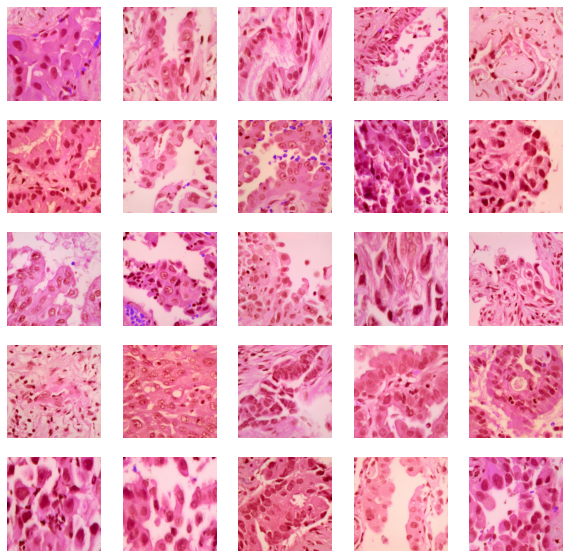

In [ ]:
n = 5
paths = df.path[df.classes == 'lung_aca'].values
fig, axs = plt.subplots(nrows = n , ncols = n, figsize=(10, 10))
for i in range(n*n):
  image = cv2.imread(paths[i])
  axs[i//n, i%n].imshow(image)
  axs[i//n, i%n].axis('off')

plt.show()

**Colon_aca**

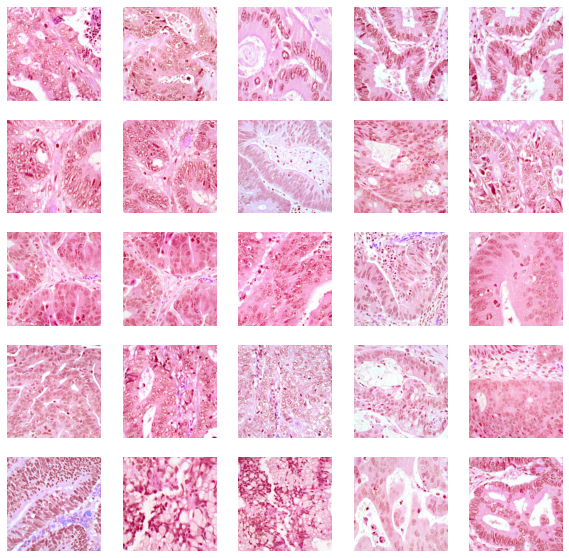

In [ ]:
n = 5
paths = df.path[df.classes == 'colon_aca'].values
fig, axs = plt.subplots(nrows = n , ncols = n, figsize=(10, 10))
for i in range(n*n):
  image = cv2.imread(paths[i])
  axs[i//n, i%n].imshow(image)
  axs[i//n, i%n].axis('off')

plt.show()

**Colon_n**

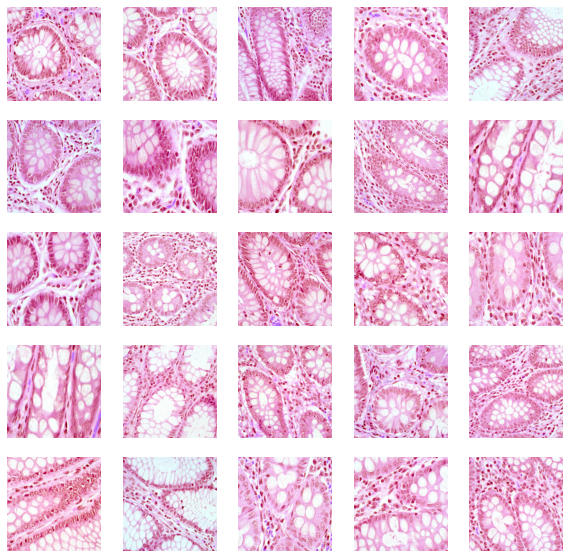

In [ ]:
n = 5
paths = df.path[df.classes == 'colon_n'].values
fig, axs = plt.subplots(nrows = n , ncols = n, figsize=(10, 10))
for i in range(n*n):
  image = cv2.imread(paths[i])
  axs[i//n, i%n].imshow(image)
  axs[i//n, i%n].axis('off')

plt.show()

#Tensorflow

In [3]:
import tensorflow as tf
import tensorflow.keras as keras

## Tensorflow Dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/lung_colon_image_set/lung_colon_path.csv')
df

,path,classes
0,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
1,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
2,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
3,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
4,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
...,...,...
24995,/content/drive/MyDrive/DATASET/lung_colon_imag...,colon_n
24996,/content/drive/MyDrive/DATASET/lung_colon_imag...,colon_n
24997,/content/drive/MyDrive/DATASET/lung_colon_imag...,colon_n
24998,/content/drive/MyDrive/DATASET/lung_colon_imag...,colon_n


In [5]:
paths = df.path.values
classes = df.classes.values
labels = list(df.classes.value_counts().index)
labels = dict(zip(labels, range(len(labels))))
classes = keras.utils.to_categorical(list(map(lambda x: labels[x], classes)))

In [6]:
len(paths), classes.shape

(25000, (25000, 5))

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(paths, classes, test_size=0.2, stratify=classes, random_state=123)

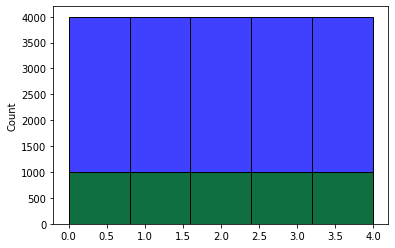

In [8]:
sns.histplot(np.argmax(y_train, axis=1), bins=5, color='blue')
sns.histplot(np.argmax(y_test, axis=1), bins=5, color='green')
plt.show()

In [9]:
y_train.shape, y_test.shape

((20000, 5), (5000, 5))

In [10]:
img_size = 224

def preprocess(path, label):
  img = tf.io.read_file(path)
  img = tf.io.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [img_size, img_size])
  img = tf.image.convert_image_dtype(img, tf.float32)
  return img, label

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(buffer_size=len(y_train), seed=123)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.cache()
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
for images, labels in train_dataset.take(1):
  print(images.shape)
  break

##ImageDataGenerator

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/lung_colon_image_set/lung_colon_path.csv')
df

,path,classes
0,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
1,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
2,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
3,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
4,/content/drive/MyDrive/DATASET/lung_colon_imag...,lung_n
...,...,...
24995,/content/drive/MyDrive/DATASET/lung_colon_imag...,colon_n
24996,/content/drive/MyDrive/DATASET/lung_colon_imag...,colon_n
24997,/content/drive/MyDrive/DATASET/lung_colon_imag...,colon_n
24998,/content/drive/MyDrive/DATASET/lung_colon_imag...,colon_n


In [5]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.1
)

In [19]:
img_size = 224
train_gen = datagen.flow_from_dataframe(
    df, x_col='path', y_col='classes',
    target_size = (img_size, img_size),
    color_mode = 'rgb', class_mode='categorical',
    batch_size=128, subset='training', shuffle=False,
    seed=123
)

valid_gen = datagen.flow_from_dataframe(
    df, x_col='path', y_col='classes',
    target_size = (img_size, img_size),
    color_mode = 'rgb', class_mode='categorical',
    batch_size=128, subset='validation', shuffle=False,
    seed=123
)

Found 22500 validated image filenames belonging to 5 classes.
Found 2500 validated image filenames belonging to 5 classes.


##Model

In [7]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7

In [8]:
ptm = EfficientNetB7(
    input_shape=(img_size, img_size, 3),
    weights='imagenet',
    include_top=False)

ptm.trainable = False

258088960/258076736 [==============================] - 1s 0us/step


In [20]:
x = keras.layers.GlobalAveragePooling2D()(ptm.output)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)
outputs = keras.layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs=ptm.inputs, outputs=outputs)

In [ ]:
model.summary()

In [21]:
METRICS = [
           'accuracy'
]

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/lungcolon.h5',
    monitor='val_accuracy',
    save_best_only=True
)

model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=METRICS
)

**For TF Dataset**

In [ ]:
model.fit(train_dataset, epochs=10, validation_data=test_dataset, callbacks=[checkpoint_callback])

Epoch 1/10


**For ImageDataGenerator**

In [ ]:
STEP_SIZE_TRAIN = train_gen.n//train_gen.batch_size
STEP_SIZE_VALID = valid_gen.n//valid_gen.batch_size
model.fit(train_gen,steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_gen, validation_steps=STEP_SIZE_VALID, epochs=20, callbacks=[checkpoint_callback])

Epoch 1/20
  2/175 [..............................] - ETA: 2:27:50 - loss: 1.0245 - accuracy: 0.5312